In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Team data files
nhl_team_path = "Teams.csv"

# Read the mouse data and the study results
nhl_team_data = pd.read_csv(nhl_team_path)


# Display the data table for preview
nhl_team_data.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
0,1909,NHA,COB,BKN,NaN,NaN,4,NaN,12,4,...,104,Cobalt Silver Kings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,NHA,HAI,MTL,NaN,NaN,5,NaN,12,4,...,83,Haileybury Hockey Club,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,NHA,LES,TBS,NaN,NaN,7,NaN,12,2,...,100,Les Canadiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,NHA,MOS,MOS,NaN,NaN,6,NaN,12,3,...,95,Montreal Shamrocks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,NHA,MOW,MTW,NaN,NaN,1,NaN,12,11,...,41,Montreal Wanderers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


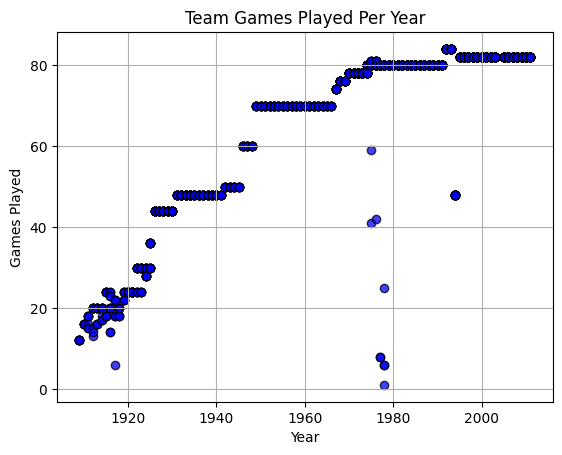

In [3]:
# Building scatter plot for games played per year
plt.scatter(nhl_team_data["year"],nhl_team_data["G"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Team Games Played Per Year")
plt.xlabel("Year")
plt.ylabel("Games Played")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

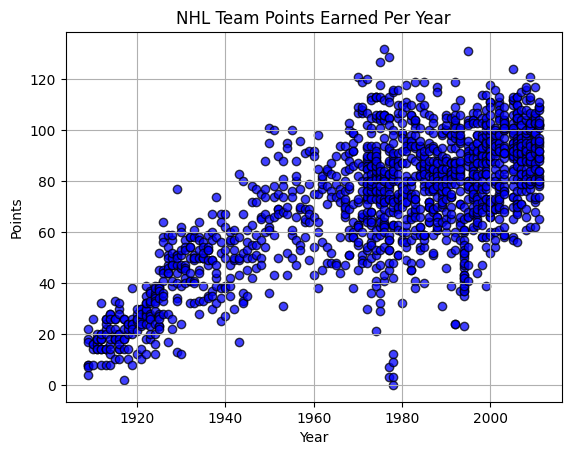

In [27]:
# Building scatter plot for years vs. points earned
plt.scatter(nhl_team_data["year"],nhl_team_data["Pts"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Points Earned Per Year")
plt.xlabel("Year")
plt.ylabel("Points")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

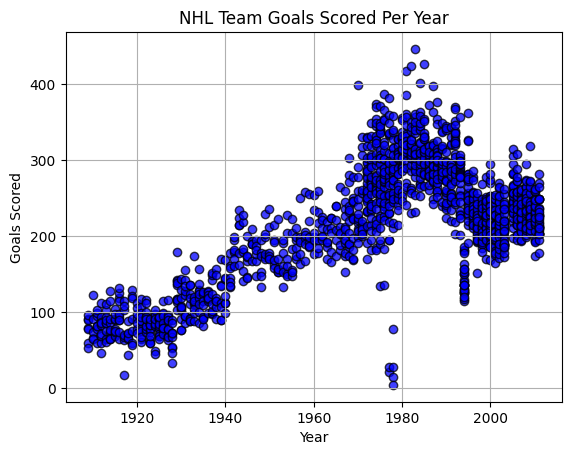

In [28]:
# Building scatter plot for years vs. team goals scored
plt.scatter(nhl_team_data["year"],nhl_team_data["GF"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Goals Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Goals Scored")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Creating a dataset for 1980-2011

In [6]:
# Creating subset of data for 1980-2011
nhl_modern_data = pd.DataFrame(nhl_team_data.loc[(nhl_team_data["year"]>=1980),:])
nhl_modern_data.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,G,W,...,GA,name,PIM,BenchMinor,PPG,PPC,SHA,PKG,PKC,SHF
727,1980,NHL,BOS,BOS,WA,AD,2,PRE,80,37,...,272,Boston Bruins,1836.0,26.0,87.0,342.0,8.0,82.0,358.0,13.0
728,1980,NHL,BUF,BUF,WA,AD,1,QF,80,39,...,250,Buffalo Sabres,1194.0,22.0,73.0,310.0,10.0,44.0,268.0,9.0
729,1980,NHL,CAL,CAL,CC,PT,3,SF,80,39,...,298,Calgary Flames,1450.0,24.0,81.0,301.0,12.0,70.0,364.0,8.0
730,1980,NHL,CHI,CHI,CC,SM,2,PRE,80,31,...,315,Chicago Black Hawks,1660.0,30.0,67.0,302.0,9.0,91.0,364.0,8.0
731,1980,NHL,COR,NJD,CC,SM,5,NaN,80,22,...,344,Colorado Rockies,1418.0,36.0,76.0,373.0,8.0,70.0,286.0,5.0


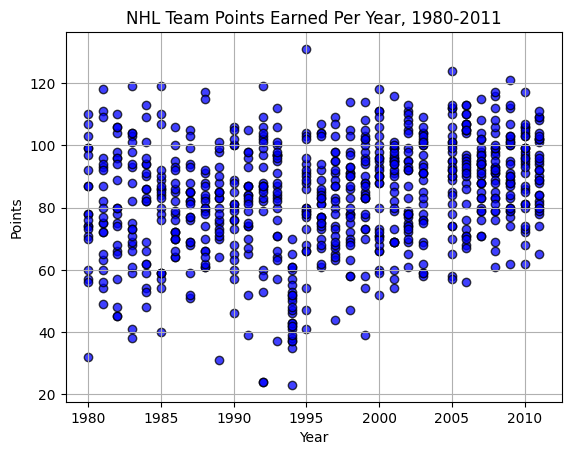

In [20]:
# Building scatter plot for years vs. points scored in modern data
plt.scatter(nhl_modern_data["year"],nhl_modern_data["Pts"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Points Earned Per Year, 1980-2011")
plt.xlabel("Year")
plt.ylabel("Points")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

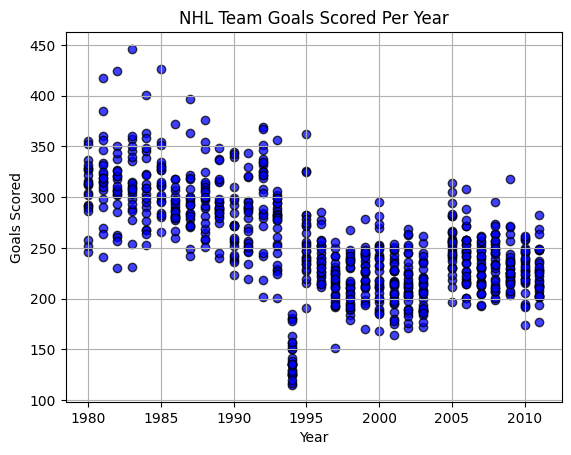

In [29]:
# Building scatter plot for years vs. team goals scored
plt.scatter(nhl_modern_data["year"],nhl_modern_data["GF"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("NHL Team Goals Scored Per Year")
plt.xlabel("Year")
plt.ylabel("Goals Scored")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [11]:
#Dataframe for years
years_list_pull = nhl_modern_data.filter(["year"], axis=1)
years_list_values = years_list_pull.drop_duplicates("year", keep='first')
years_list_values = years_list_values.sort_values("year", ascending=True)
years_list = years_list_values.set_index("year")
years_list.head()

""
year
1980
1981
1982
1983
1984


In [23]:
yearly_points_dst = nhl_modern_data.groupby("year")
points_earned = yearly_points_dst["Pts"]

mean_points_earned = points_earned.mean()
median_points_earned = points_earned.median()
var_points_earned = points_earned.var()
stdev_points_earned = points_earned.std()
sem_points_earned = points_earned.sem()

# Assemble the resulting series into a single summary DataFrame.

points_earned_summary = years_list.copy()
points_earned_summary["Mean Points Earned"] = mean_points_earned
points_earned_summary["Median Points Earned"] = median_points_earned
points_earned_summary["Points Earned Variance"] = var_points_earned
points_earned_summary["Points Earned Std. Dev"] = stdev_points_earned
points_earned_summary["Points Earned Std. Err"] = sem_points_earned

points_earned_summary

,Mean Points Earned,Median Points Earned,Points Earned Variance,Points Earned Std. Dev,Points Earned Std. Err
year,,,,,
1980,80.000000,78.0,377.300000,19.424212,4.238710
1981,80.000000,77.0,368.900000,19.206770,4.191261
1982,80.000000,80.0,428.700000,20.705072,4.518217
1983,80.000000,75.0,457.600000,21.391587,4.668027
1984,80.000000,83.0,358.200000,18.926172,4.130029
1985,80.000000,84.0,389.700000,19.740821,4.307800
1986,80.000000,78.0,148.200000,12.173742,2.656528
1987,80.000000,82.0,225.700000,15.023315,3.278356
1988,80.000000,80.0,241.800000,15.549920,3.393271


In [25]:
points_earned_summary["year"] = points_earned_summary.index

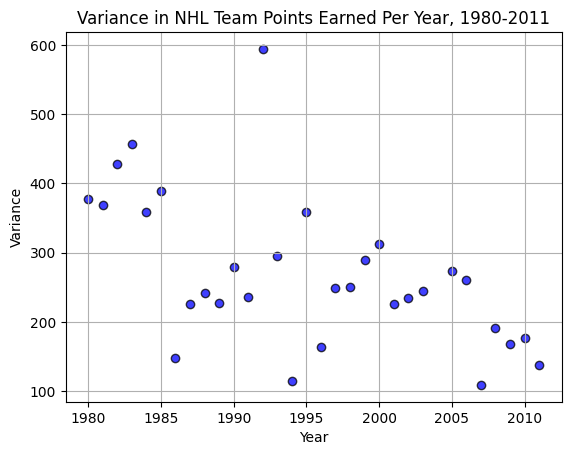

In [31]:
# Building scatter plot for years vs. variance in points scored in modern data
plt.scatter(points_earned_summary["year"],points_earned_summary["Points Earned Variance"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Variance in NHL Team Points Earned Per Year, 1980-2011")
plt.xlabel("Year")
plt.ylabel("Variance")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

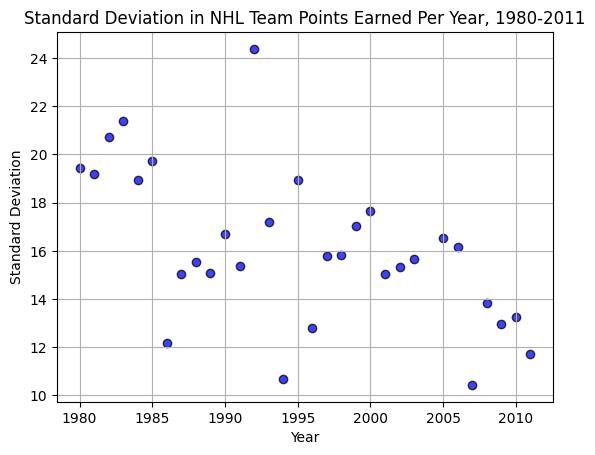

In [30]:
# Building scatter plot for years vs. variance in points scored in modern data
plt.scatter(points_earned_summary["year"],points_earned_summary["Points Earned Std. Dev"], marker="o", facecolors="blue", edgecolors="black", alpha=.75)

# Incorporate the other graph properties
plt.title("Standard Deviation in NHL Team Points Earned Per Year, 1980-2011")
plt.xlabel("Year")
plt.ylabel("Standard Deviation")
#plt.ylim(-60,45)
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()